In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['SCL90_ANS_FOB', 'CSI_EXPEMOC', 'CSI_AUTOCRIT', 'SCL90_IDEA_PARAN', 'SCL90_SOMAT', 'SCL90_PSICOT', 'CAPE_NEG_MALESTAR', 'CAPE_NEG_FREC', 'CSI_APOYOSOC', 'CAPE_DEPRE_MALESTAR', 'CAPE_POS_MALESTAR', 'CSL90_HOSTIL', 'CSI_PENSDESID', 'CSI_EVITPROBL', 'CAPE_DEPRE_FREC', 'ANSIEDADRASGO', 'TRAUMA_FRECUENCIA', 'SCL90_OBS_COMP', 'SCL90_ANSIE', 'CSI_RESPROBL', 'CAPE_POSIT_FREC', 'SCL90_DEPRE', 'CSL90_SENS_INT', 'ESTRES_PERCIBIDO', 'CSI_REESTCOGN', 'CSI_RETISOC', 'TRAUMA_AFECTACION']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 0.425337  1.296075  0.145201  0.860113 ...  1.586066 -1.32864   0.234189 -0.770926]
 [-0.688022  2.053158 -0.560477 -0.897894 ... -1.283911  0.158335 -1.035133 -1.154459]
 [-0.688022 -0.975172 -1.266155 -0.897894 ... -1.283911 -0.585153  0.445743  0.123986]
 [-0.502462 -0.975172  1.380138 -0.897894 ...  0.151077 -0.399281  1.715065 -0.856155]
 [-0.688022 -0.596631  1.203718 -0.116557 ...  1.107736 -0.213409 -0.188918  0.67798 ]]
[1 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.000364,1.012511,0.604651,02:35
1,0.877103,0.915888,0.697674,02:31
2,0.818677,0.869679,0.720930,02:31
3,0.768228,0.845772,0.720930,02:32
4,0.718140,0.812283,0.790698,02:34


SCL90_ANS_FOB,CSI_EXPEMOC,CSI_AUTOCRIT,SCL90_IDEA_PARAN,SCL90_SOMAT,SCL90_PSICOT,CAPE_NEG_MALESTAR,CAPE_NEG_FREC,CSI_APOYOSOC,CAPE_DEPRE_MALESTAR,CAPE_POS_MALESTAR,CSL90_HOSTIL,CSI_PENSDESID,CSI_EVITPROBL,CAPE_DEPRE_FREC,ANSIEDADRASGO,TRAUMA_FRECUENCIA,SCL90_OBS_COMP,SCL90_ANSIE,CSI_RESPROBL,CAPE_POSIT_FREC,SCL90_DEPRE,CSL90_SENS_INT,ESTRES_PERCIBIDO,CSI_REESTCOGN,CSI_RETISOC,TRAUMA_AFECTACION,target,prediction
-0.6880,0.3497,2.0858,-0.8979,0.5156,0.5051,-0.0425,0.0361,1.6052,0.4405,0.2197,-0.6153,0.7717,1.6571,0.1242,0.3519,-0.3719,0.3242,0.6526,-0.7208,-0.1545,0.8337,-0.6075,1.5861,-0.3993,-0.8236,-0.1317,0,0
-0.6880,-0.0288,-0.5605,-0.8979,-0.9378,-0.8305,-0.1338,-0.3691,-0.0856,-0.9407,-0.6739,-0.6153,-1.2250,-0.5445,-0.8044,-0.7190,-0.9380,-1.0786,-0.9115,1.5119,-0.3149,-1.0102,-0.8801,-1.2839,1.8312,-0.4005,-0.7283,0,0
2.0954,0.1605,0.4980,1.2508,1.8721,1.1729,0.6884,0.1712,-0.0856,1.4073,0.2197,0.4588,0.1061,0.3361,0.5885,0.1990,-0.7493,1.1874,2.5776,-0.3149,-0.1545,1.7155,0.6192,1.1077,0.3442,0.2342,-0.6005,0,0
0.0542,-1.3537,-0.3841,0.0788,0.5156,-0.1627,0.0489,1.7921,-1.4383,0.0261,-0.4505,1.3180,0.6053,2.7579,1.2849,-1.0250,1.9866,1.1874,-0.3100,-1.5327,-0.3149,1.2345,0.3466,0.8686,-1.1428,2.5613,1.6155,1,1
0.2398,-1.5430,0.4980,1.4461,1.0000,0.2380,1.3279,1.2518,-1.6073,1.9598,0.3314,0.0292,-1.0586,-1.2050,1.0528,-0.8720,-0.3719,0.7558,0.5323,-1.7357,-0.1545,0.4328,1.3007,1.3469,-1.7004,1.0804,0.1666,1,1


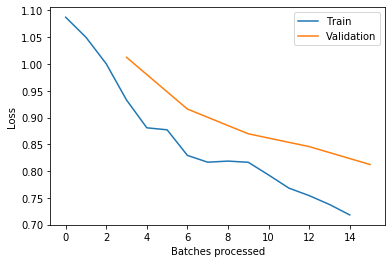

In [10]:
learn.recorder.plot_losses()
learn.show_results()

In [11]:
# el numero en el nombre es el porcentaje de precision, en este caso el porcentaje es 0.790698
learn.save("trained_model_790698", return_path=True)

WindowsPath('C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/models/trained_model_790698.pth')